In [40]:
from collections import defaultdict
import matplotlib.pyplot as plt
import pandas as pd
import ast
import os

In [36]:
file = open(os.path.join("data", "speaker_hallucinating_listener_with_attention.txt"), "r")
content = file.read()
lines = content.split('\n')

## Average utterance length


In [104]:
_utterances = [ast.literal_eval(line) for line in lines if line]

utterances = [None] * len(_utterances)
for index, u in enumerate(_utterances):
    utterances[index] = []
    # Remove <s>, </s> and concatenate +er, +ish, etc..
    special_tokens = ['<s>','</s>']
    for j, token in enumerate(u):
        if token in special_tokens:
            continue
        elif token.startswith('+') and len(utterances[index]):
            utterances[index][-1] = str(utterances[index][-1]) + token.replace('+','')
        else:
            utterances[index].append(token)
            

average_utterance_length = sum([len(u) for u in utterances])/len(utterances)
average_raw_utterance_length = sum([len(u) for u in _utterances])/len(_utterances)

print(f"Average utterance length (human-like): {average_utterance_length}")
print(f"Average utterance length (actuals tokens): {average_raw_utterance_length}")

Average utterance length (human-like): 1.7135926461826538
Average utterance length (actuals tokens): 3.956336709507192


## Distribution of utterance lengths

Distribution of utterance lengths


<BarContainer object of 19 artists>

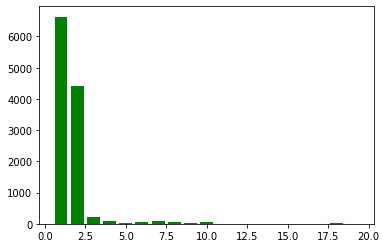

In [95]:
utterance_lengths = defaultdict(int)
for u in utterances:
    utterance_lengths[len(u)] += 1

print('Distribution of utterance lengths')
plt.bar(utterance_lengths.keys(), utterance_lengths.values(), color='g')


## Number of tokens used

In [102]:
tokens = defaultdict(int)
raw_tokens = defaultdict(int)

for u in utterances:
    for token in u:
        tokens[token] += 1
 
for u in _utterances:
    for token in u:
        raw_tokens[token] += 1

In [105]:
print(f'Total human tokens: {len(tokens)}')
print(f'Total actual tokens: {len(raw_tokens)}')


Total human tokens: 197
Total actual tokens: 175


## Token distribution

Most frequent tokens


<BarContainer object of 50 artists>

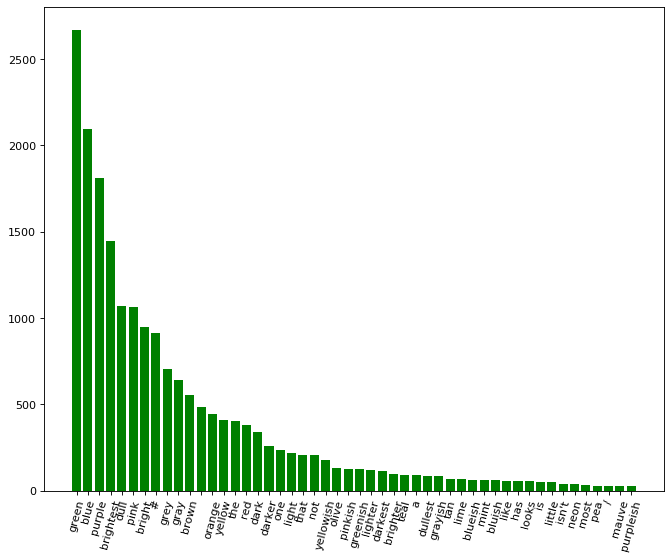

In [100]:

top_n = 50
most_frequent_tokens = dict(sorted(tokens.items(), key=lambda x: x[1], reverse=True)[:50])
from matplotlib.pyplot import figure

figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
print('Most frequent tokens')
plt.xticks(rotation=75)
plt.bar(most_frequent_tokens.keys(), most_frequent_tokens.values(), color='g')
